## 🧠 Insights احم احم
### How does price range correlate with customer ratings?

### Do restaurants with few ratings ever display high scores?

### Which restaurants have the highest scores overall?

### What is the average menu price by price category?

### Do menu prices vary more within cheap or expensive restaurants?


### Start with Price range correlation with Customer ratings

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/processed/processed_restaurants_logged.csv')

# Remove NaN from score 3shan n7sb sa7
df_valid = df[df['score'].notna()].copy()


# $ عامله مشكله 
price_map = {
    '$': 'cheap',
    '$$': 'moderate',
    '$$$': 'expensive',
    '$$$$': 'luxury'
}

df_valid['price_group'] = df_valid['price_range'].map(price_map)



## Visualize Scores by Price Range with Boxplot

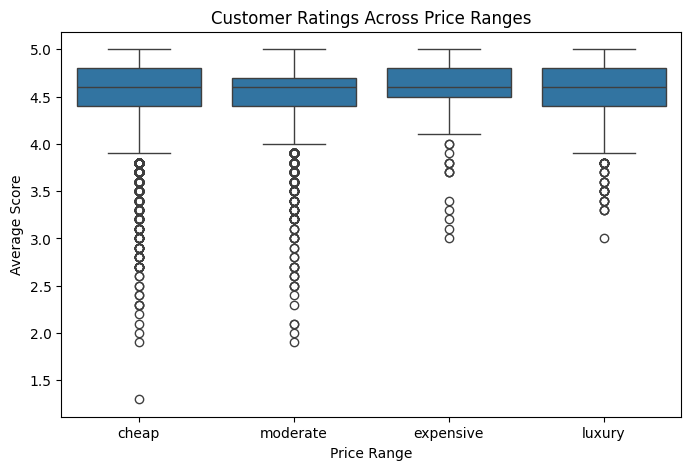

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='price_group', y='score', order=['cheap', 'moderate', 'expensive', 'luxury'])
plt.title('Customer Ratings Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Score')
plt.show()

# Describe scores per group

In [45]:
df_valid.groupby('price_group')['score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
price_group,,,,,,,,
cheap,26312.0,4.56,0.30,1.3,4.4,4.6,4.8,5.0
expensive,250.0,4.57,0.32,3.0,4.5,4.6,4.8,5.0
luxury,1132.0,4.55,0.29,3.0,4.4,4.6,4.8,5.0
moderate,7324.0,4.52,0.32,1.9,4.4,4.6,4.7,5.0


# CORELLATION ANALYSIS

In [46]:
price_numeric = {'cheap': 1, 'moderate': 2, 'expensive': 3, 'luxury': 4}
df_valid['price_numeric'] = df_valid['price_group'].map(price_numeric)

correlation = df_valid[['price_numeric', 'score']].corr().iloc[0, 1]
print(f"Correlation between price level and average score: {correlation:.3f}")

if correlation > -0.05 and correlation < 0.05:
    print("No or very weak correlation between price level and average score.")
elif correlation > 0.05:
    print("Positive correlation between price level and average score.")


Correlation between price level and average score: -0.032
No or very weak correlation between price level and average score.
